# Ćwiczenia 1
W trakcie ćwiczeń implementowana będzie metoda przeszukiwania - Metoda gradientu prostego.
Celem ćwiczeń jest implementacja metody gradientu prostego dla dwóch funkcji oraz przebadanie wpływu rozmiaru kroku dla różnych (losowych) punktów początkowych. Należy zwizualizować proces minimalizacji na wykresie 2D.

## Punktacja:
 - obliczenie gradientów funkcji 1 pkt
 - implementacja kroku gradientu prostego 1 pkt
 - przeprowadzenie przeszukiwania minimum na obu funkcjach 1 pkt
 - wizualizacja przeszukiwania z wielu miejsc początkowych 1 pkt


In [2]:
from typing import Callable, Tuple
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Funkcje do przeszukania:
\begin{equation}
f(\textbf{x})=x_1^2+x_2^2
\end{equation}

\begin{equation}
g(x) = 1.5-\exp \left\{-x_1^2-x_2^2\right\}-0.5 \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{equation}

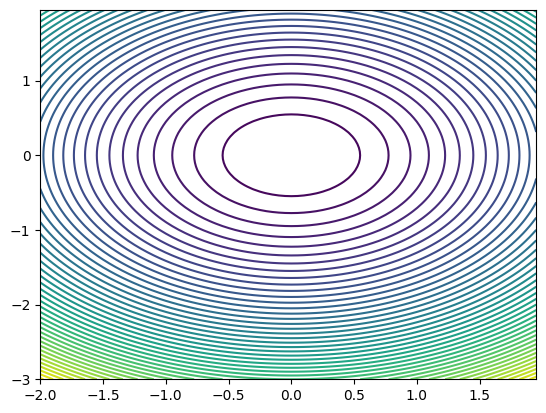

In [3]:
# Function to analyze
X = np.arange(-2, 2, 0.05)
Y = np.arange(-3, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2

# Contour plot en 2D
plt.figure()
plt.contour(X, Y, Z, 50)

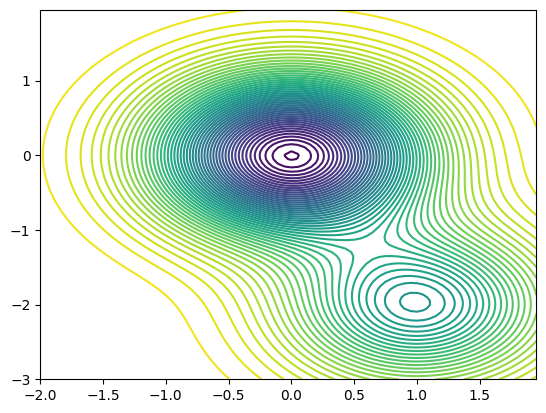

In [4]:
X = np.arange(-2, 2, 0.05)
Y = np.arange(-3, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z =1.5-np.exp(-X**(2)-Y**(2))-0.5*np.exp(-(X-1)**(2)-(Y+2)**(2))
# Contour plot en 2D

plt.figure()
plt.contour(X, Y, Z, 50)


Gradienty funkcji
\begin{equation}
\nabla f(x)=
\begin{bmatrix}
2x_1 \\
2x_2
\end{bmatrix}
\end{equation}

\begin{equation}
\nabla g(x)=
\begin{bmatrix}
2 x_1 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_1-1\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\} \\
2 x_2 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_2+2\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{bmatrix}
\end{equation}

In [5]:
class SimpleGradientDescent:
    X = np.arange(-2, 2, 0.05)
    Y = np.arange(-3, 2, 0.05)
    X, Y = np.meshgrid(X, Y)

    def __init__(self,
                 func: Callable[[float, float], float],
                 grad_func: Callable[[float, float], Tuple[float, float]],
                 alpha:float=0.1):
        self.alpha = alpha
        self.func = func
        self.grad_func = grad_func
        self.trace = None  # trace of search

    def _calc_Z_value(self):
        self.Z = self.func(self.X, self.Y)

    def plot_func(self):
        self._calc_Z_value()
        plt.figure()
        diag = plt.contour(self.X, self.Y, self.Z, 50)
        plt.clabel(diag)
        if len(self.trace)>0:
          for i in range(1, len(self.trace)):
            plt.annotate('', xy=(self.trace[i][0], self.trace[i][1]), xytext=(self.trace[i-1][0], self.trace[i-1][1]), arrowprops={'arrowstyle':'->'})
          plt.scatter(self.trace[:,0], self.trace[:,1], s=10)

    def calculate_func_vale(self, x1:float, x2:float) -> float:
        return(self.func(x1, x2))

    def calculate_func_grad(self, x1:float, x2:float) -> Tuple[float, float]:
        return(self.grad_func(x1, x2))

    def gradient_descent_step(self, x1:float, x2:float) -> Tuple[float, float]:
      grad_value = self.grad_func(x1, x2)
      x1 = x1 - self.alpha * grad_value[0]
      x2 = x2 - self.alpha * grad_value[1]
      return (x1, x2)

    def minimize(self, x1_init:float, x2_init:float, steps:int, verbose:int=0, plot:bool=False)->float:
      x1 = x1_init
      x2 = x2_init
      self.trace = np.zeros(shape = (steps + 1, 2))
      for i in range(steps):
        self.trace[i][0] = x1
        self.trace[i][1] = x2
        (x1, x2) = self.gradient_descent_step(x1, x2)
      self.trace[steps][0] = x1
      self.trace[steps][1] = x2
      if verbose == 1:
         print(self.trace)
      if plot:
         self.plot_func()
      return(self.calculate_func_vale(x1, x2))

# Funkcja 1

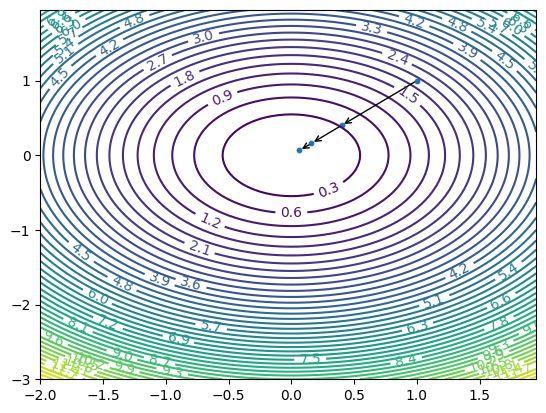

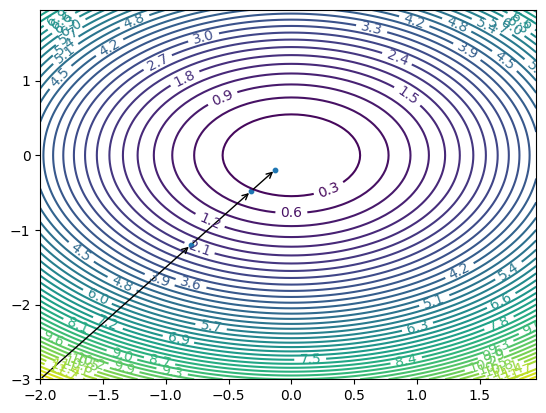

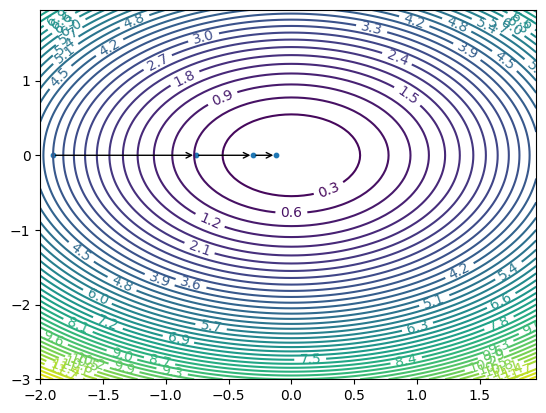

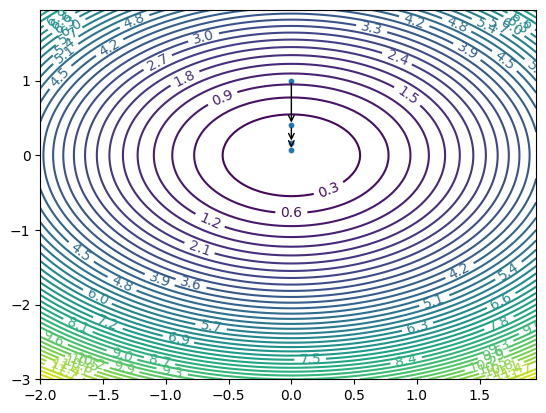

In [34]:
def func_one(x1: float, x2:float) -> float:
  return(x1**2 + x2**2)

def grad_one(x1:float, x2:float) -> Tuple[float, float]:
  return(2*x1, 2*x2)

s1 = SimpleGradientDescent(func_one, grad_one, alpha=0.3)
res1 = s1.minimize(1, 1, 3, plot = True)
res2 = s1.minimize(-2, -3, 3, plot=True)
res3 = s1.minimize(-1.9, 0, 3, plot=True)
res4 = s1.minimize(0, 1, 3, plot=True)


# Funkcja 2

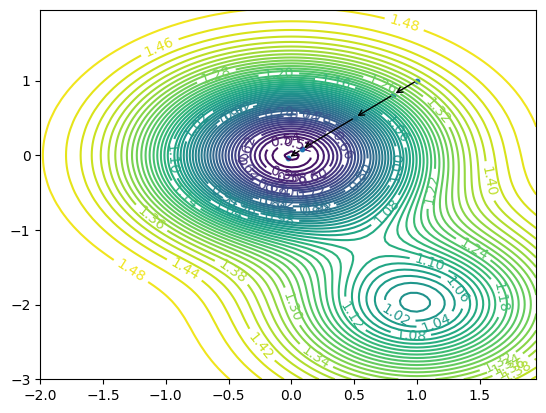

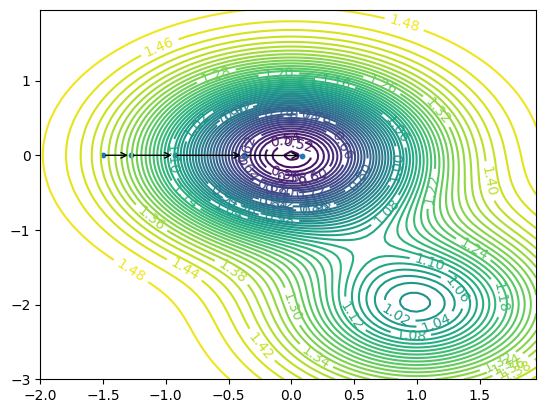

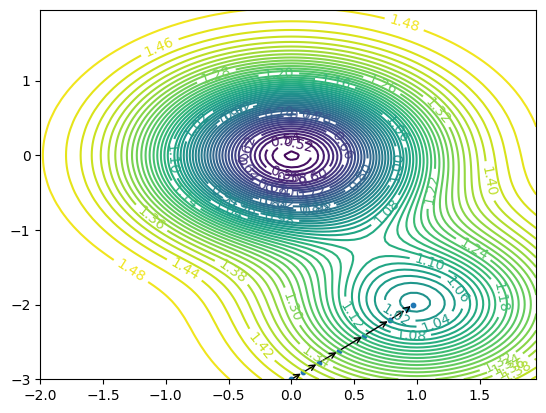

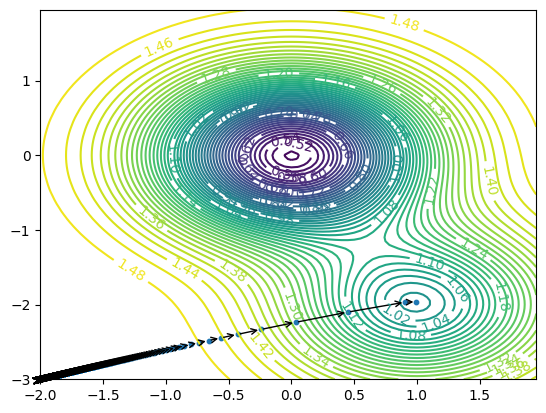

In [40]:
def func_two(x1: float, x2:float):
    return(1.5 - np.exp(- x1**2 - x2**2) - 0.5*np.exp(- (x1-1)**2 - (x2+2)**2))

def grad_two(x1: float, x2:float):
    return(2* x1 * np.exp(- x1**2 - x2**2) + (x1 - 1) * np.exp(- (x1-1)**2 - (x2 + 2)**2),
           2* x2 * np.exp(- x1**2 - x2**2) + (x2 + 2) * np.exp(- (x1-1)**2 - (x2 + 2)**2))

s2 = SimpleGradientDescent(func_two, grad_two, alpha= 0.7)

res1 = s2.minimize(1, 1, 4, plot = True)
res2 = s2.minimize(-1.5, 0, 4, plot=True)
res3 = s2.minimize(0, -3, 7, plot=True)

s2_2 = SimpleGradientDescent(func_two, grad_two, alpha= 1.158)
res4 = s2_2.minimize(-2, -3, 10**3, plot=True)

#print(c)